# image process

In [1]:
# import packs
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
import skimage.io
import skimage.transform

%matplotlib inline

print("packs loaded")

packs loaded


In [2]:
# print current folder
cwd = os.getcwd()
print("current folder is %s" % (cwd))

# print last folder 
last_folder = os.path.abspath(os.path.join(cwd, os.path.pardir))
print("last folder is %s" %(last_folder))

current folder is /home/liuzhiyang/app/Jupyter_notebook/Tensorflow_tutorials/1_Basics
last folder is /home/liuzhiyang/app/Jupyter_notebook/Tensorflow_tutorials


In [3]:
# Useful function
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

## load and plot

/home/liuzhiyang/.conda/envs/jupyter/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


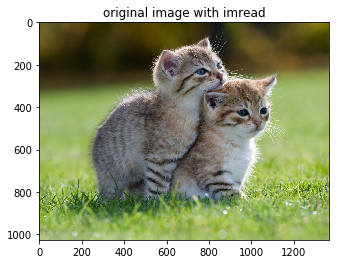

In [4]:
# load
cat = imread(last_folder + '/images/cat.jpg')
print_typeshape(cat)

# plot
plt.figure(0)
plt.imshow(cat)
plt.title("original image with imread")
plt.draw()

/home/liuzhiyang/.conda/envs/jupyter/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


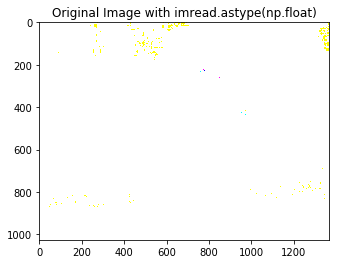

In [5]:
# load 
cat2 = imread(last_folder + "/images/cat.jpg").astype(np.float)
print_typeshape(cat2)
# Plot
plt.figure(0)
plt.imshow(cat2)
plt.title("Original Image with imread.astype(np.float)")
plt.draw()

/home/liuzhiyang/.conda/envs/jupyter/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


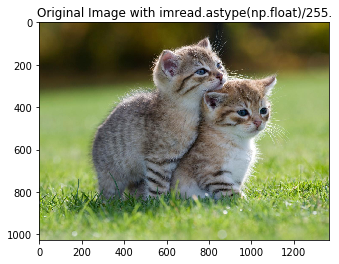

In [16]:
# Load
cat3 = imread(last_folder + "/images/cat.jpg").astype(np.float)
print_typeshape(cat3)
# Plot
plt.figure(0)
plt.imshow(cat3/255.)
plt.title("Original Image with imread.astype(np.float)/255.")
plt.draw()

## resize

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


/home/liuzhiyang/.conda/envs/jupyter/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  from ipykernel import kernelapp as app


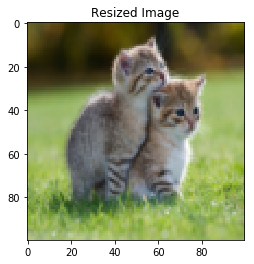

In [6]:
# resize
catsmall = imresize(cat, [100, 100, 3])
print_typeshape(catsmall)
# plot
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

## grayscale

Type is <class 'numpy.ndarray'>
Shape is (100, 100)


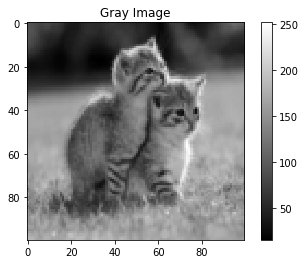

In [7]:
# gray scale
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
    else:
        print("Current Image if GRAY!")
        return rgb

    
catsmallgray = rgb2gray(catsmall)
print_typeshape(catsmallgray)

plt.figure(2)
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("Gray Image")
plt.colorbar()
plt.draw()

## reshape

In [8]:
# convert to vector
cat_rowvec = np.reshape(catsmallgray, (1, -1))
print_typeshape(cat_rowvec)

# convert to matrix
cat_matrix = np.reshape(cat_rowvec, (100, 100))
print_typeshape(cat_matrix)

Type is <class 'numpy.ndarray'>
Shape is (1, 10000)
Type is <class 'numpy.ndarray'>
Shape is (100, 100)


## load from folder

In [9]:
# load from folder
path = last_folder + "/images/cats"
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]

# print file number in folder
print("%d files in %s" %(len(os.listdir(path)), path))

# append images and their names to lists
imgs = []
names = []
for f in os.listdir(path):
    # 获得剔除路径后的文件名
    ext = os.path.splitext(f)[1]
     # print(os.path.splitext(f)[0])  返回不带后缀的文件名(带路径), 例如image1.jpg, 返回image1
     # print(os.path.splitext(f)[1])  返回文件的后缀, 例如image1.jpg, 返回.jpg
    # check types
    if ext.lower() not in valid_exts:
        continue
    full_path = os.path.join(path, f)
    imgs.append(imread(full_path))
    names.append(os.path.splitext(f)[0] + os.path.splitext(f)[1])
print("%d images loaded" %(len(imgs)))

38 files in /home/liuzhiyang/app/Jupyter_notebook/Tensorflow_tutorials/images/cats
38 images loaded


/home/liuzhiyang/.conda/envs/jupyter/lib/python3.6/site-packages/ipykernel/__main__.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


[0] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: images (23).jpeg
    Size of 'curr_img': (183, 275, 3)


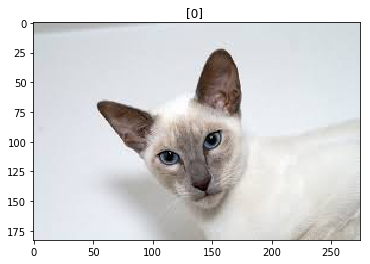

[1] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: images (26).jpeg
    Size of 'curr_img': (225, 225, 3)


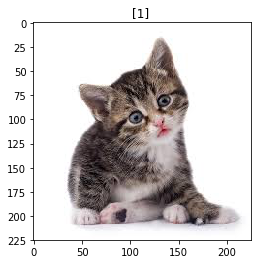

[2] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: 다운로드.jpeg
    Size of 'curr_img': (225, 225, 3)


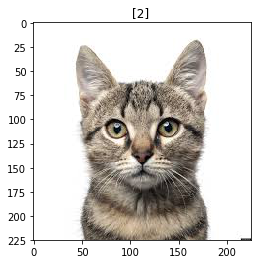

In [10]:
# check
n_imgs = len(imgs)
randidx = np.sort(np.random.randint(n_imgs, size=3)) # 在n_imgs范围内产生3个整数随机数
for curr_img, curr_name, i in zip([imgs[j] for j in randidx], [names[j] for j in randidx], range(len(randidx))):
    print ("[%d] Type of 'curr_img': %s" % (i, type(curr_img)))
    print ("    Name is: %s" % (curr_name))
    print ("    Size of 'curr_img': %s" % (curr_img.shape,))
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("[" + str(i) + "] ")
    # plt.draw()
    plt.show()